# Imports and functions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
monday = pd.read_csv('../data/raw/monday.csv', sep=';', index_col=0, parse_dates=True)
tuesday = pd.read_csv('../data/raw/tuesday.csv', sep=';', index_col=0, parse_dates=True)
wednesday = pd.read_csv('../data/raw/wednesday.csv', sep=';', index_col=0, parse_dates=True)
thursday = pd.read_csv('../data/raw/thursday.csv', sep=';', index_col=0, parse_dates=True)
friday = pd.read_csv('../data/raw/friday.csv', sep=';', index_col=0, parse_dates=True)

In [3]:
# Calculate the total number of customers in each section

def customer_section_absolut(dataframe):
    total_number = dataframe.groupby('location').size()
    return pd.DataFrame(total_number)

In [4]:
# Calculate the total number of customers in each section over time

def customer_section_time(dataframe):
    time_number = dataframe.groupby(['timestamp','location']).size()
    return pd.DataFrame(time_number)

In [5]:
# Display the number of customers at checkout over time

def checkout_time(dataframe):
    checkout = dataframe[dataframe['location'] == 'checkout']
    check_time = checkout.groupby(['timestamp','location']).size()
    return pd.DataFrame(check_time)

In [6]:
# Calculate the time each customer spent in the market

def customer_stay(dataframe):
    frame = dataframe.groupby('customer_no').resample('1min').ffill()
    frame = frame.drop(columns='customer_no')
    frame.reset_index(level=0, inplace=True)
    minutes = frame.groupby('customer_no').size()
    data = pd.DataFrame(minutes)
    data.columns=['min the customer stays in the shop']
    return data

In [7]:
# Calculate the total number of customers in the supermarket over time

def customer_time(dataframe):
    frame = dataframe.groupby('customer_no').resample('1min').ffill()
    frame = frame.drop(columns='customer_no')
    frame.reset_index(inplace=True)
    return pd.DataFrame(frame.groupby("timestamp").size())

In [8]:
# plot

def first_stop(dataframe):
    frame = monday.groupby('customer_no').resample('1min').ffill()
    frame = frame.drop(columns='customer_no')
    frame.reset_index(inplace=True)
    first =  frame.groupby('customer_no').first()
    return sns.countplot(x="location", data=first)


# I dont get the question
# plot shows where customer starts their purchase

In [9]:
# combo wombo

def explore_dataframe(dataframe):
    wombo_combo = customer_section_absolut(dataframe), customer_section_time(dataframe), checkout_time(dataframe), customer_stay(dataframe), customer_time(dataframe), first_stop(dataframe) 
    return wombo_combo 

# Results

In [10]:
# choose your day

day = monday

In [11]:
# print the results

customer_section_absolut(day)

,0
location,
checkout,1437
dairy,895
drinks,797
fruit,1005
spices,750


In [12]:
customer_section_time(day)

0
timestamp           location   
2019-09-02 07:03:00 dairy     2
2019-09-02 07:04:00 dairy     2
                    fruit     1
                    spices    3
2019-09-02 07:05:00 checkout  2
...                          ..
2019-09-02 21:49:00 dairy     1
                    fruit     2
                    spices    2
2019-09-02 21:50:00 dairy     1
                    fruit     1

[2797 rows x 1 columns]

In [13]:
checkout_time(day)

,,0
timestamp,location,
2019-09-02 07:05:00,checkout,2
2019-09-02 07:06:00,checkout,2
2019-09-02 07:07:00,checkout,1
2019-09-02 07:08:00,checkout,3
2019-09-02 07:09:00,checkout,1
...,...,...
2019-09-02 21:44:00,checkout,1
2019-09-02 21:46:00,checkout,1
2019-09-02 21:47:00,checkout,2


In [14]:
customer_stay(day)

,min the customer stays in the shop
customer_no,
1,3
2,4
3,3
4,5
5,2
...,...
1443,2
1444,2
1445,1


In [15]:
customer_time(day)

,0
timestamp,
2019-09-02 07:03:00,2
2019-09-02 07:04:00,8
2019-09-02 07:05:00,8
2019-09-02 07:06:00,12
2019-09-02 07:07:00,12
...,...
2019-09-02 21:46:00,10
2019-09-02 21:47:00,11
2019-09-02 21:48:00,9


<AxesSubplot:xlabel='location', ylabel='count'>

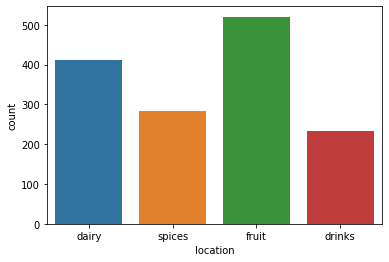

In [16]:
first_stop(day)

(             0
 location      
 checkout  1437
 dairy      895
 drinks     797
 fruit     1005
 spices     750,
                               0
 timestamp           location   
 2019-09-02 07:03:00 dairy     2
 2019-09-02 07:04:00 dairy     2
                     fruit     1
                     spices    3
 2019-09-02 07:05:00 checkout  2
 ...                          ..
 2019-09-02 21:49:00 dairy     1
                     fruit     2
                     spices    2
 2019-09-02 21:50:00 dairy     1
                     fruit     1
 
 [2797 rows x 1 columns],
                               0
 timestamp           location   
 2019-09-02 07:05:00 checkout  2
 2019-09-02 07:06:00 checkout  2
 2019-09-02 07:07:00 checkout  1
 2019-09-02 07:08:00 checkout  3
 2019-09-02 07:09:00 checkout  1
 ...                          ..
 2019-09-02 21:44:00 checkout  1
 2019-09-02 21:46:00 checkout  1
 2019-09-02 21:47:00 checkout  2
 2019-09-02 21:48:00 checkout  2
 2019-09-02 21:49:00 checkout  2
 

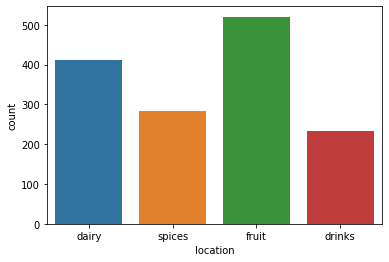

In [17]:
# there must be a better way

explore_dataframe(monday)